In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools
import community as community_louvain
import torch_geometric.transforms as T
from torch_geometric.datasets import IMDB
import matplotlib.cm as cm
import torch
import dgl
import torch_geometric.utils.convert
import warnings
warnings.filterwarnings('ignore')

### DBLP

In [2]:
dataset = IMDB(root='./imdb_data')
data = dataset[0]

#Create metagraph
g = torch_geometric.utils.convert.to_dgl(data)
meta_graph= g.metagraph()

In [3]:
path = 'imdb_expln_graphs/vae/'

In [4]:
def get_node_type(node_type):
    if node_type == 1:
        return 'actor'
    elif node_type == 0:
        return 'director'
    elif node_type == 2:
        return 'movie'

In [5]:
def remove_edges(graph):
    

    #Get small graph edges
    edges = [e for e in graph.edges]
    
    node_types=nx.get_node_attributes(graph, "class")
   
    source,dest =list(map(list, zip(*edges)))
    remaining_edges = []
    
    for i in range(len(edges)):
        source_node_type = get_node_type(node_types[source[i]])
        dest_node_type = get_node_type(node_types[dest[i]])
        
        if not (source_node_type,dest_node_type) in list(meta_graph.edges()):
            remaining_edges.append((source[i],dest[i]))
    
    graph.remove_edges_from(remaining_edges)        
    graph.remove_nodes_from(list(nx.isolates(graph)))

    print('node count',graph.number_of_nodes())
    print('edge count',graph.number_of_edges())
    #print(remaining_edges)
    return graph

In [6]:
def plot_graph(G):

    color_class_map = {0: 'blue', 1: 'red', 2: 'darkgreen'}

    nx.draw(G, 
        with_labels=False, node_color=[color_class_map[node[1]['class']] 
                        for node in G.nodes(data=True)], 
            node_size=200,
        font_color='white')
    plt.show() 

In [7]:
def plot_partition(G,partition):
    # draw the graph
    pos = nx.spring_layout(G)
    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,label=True,
                            cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

In [8]:
def detect_community(G):
    partition = community_louvain.best_partition(G)
    plot_partition(G,partition)

Explanation graph of class 0

In [9]:
class0_graph = nx.read_gexf(path+'sync66614233322/sync66614233322_G10.gexf')

In [10]:
syn_class_path = path + 'sync66614233322/sync66614233322_node_class10.pt'
node_class_syn = torch.load(syn_class_path).detach().numpy()
nx.set_node_attributes(class0_graph, dict(zip(class0_graph.nodes(), node_class_syn)), 'class')
class0 = remove_edges(class0_graph)

node count 7
edge count 6


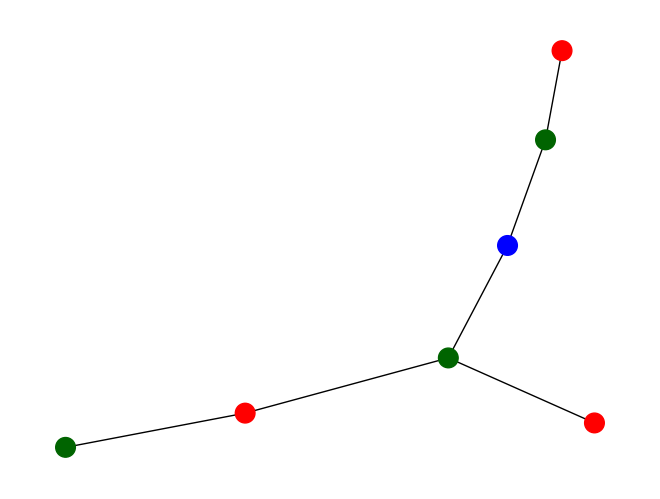

In [11]:
plot_graph(class0)

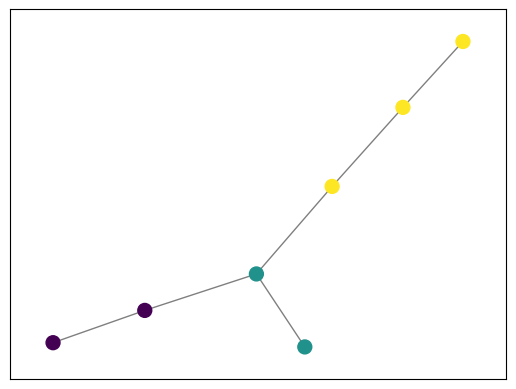

[{'5', '7'}, {'1', '3', '6'}, {'2', '4'}]

In [12]:
detect_community(class0)
list_com= nx.community.louvain_communities(class0, seed=123)
list_com

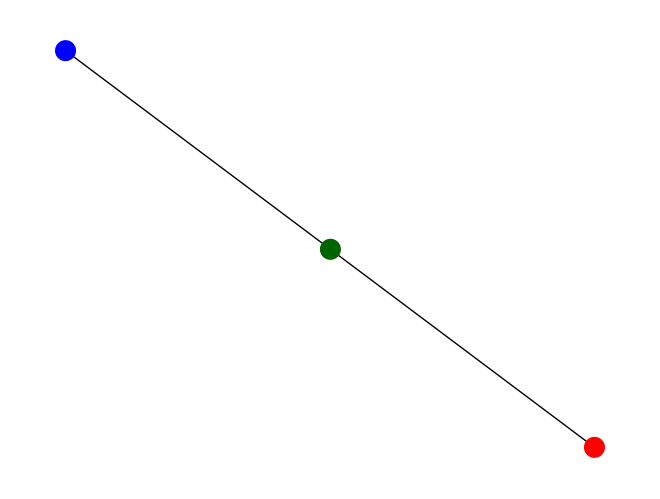

In [13]:
#Largest substructure
H = class0.subgraph(max(list_com, key=len))
plot_graph(H)

Explanation graph of class 1

In [14]:
class1_graph = nx.read_gexf(path+'sync20423233414/sync20423233414_G15.gexf')

In [15]:
syn_class_path = path + 'sync20423233414/sync20423233414_node_class15.pt'
node_class_syn = torch.load(syn_class_path).detach().numpy()
nx.set_node_attributes(class1_graph, dict(zip(class1_graph.nodes(), node_class_syn)), 'class')
class1 = remove_edges(class1_graph)

node count 13
edge count 12


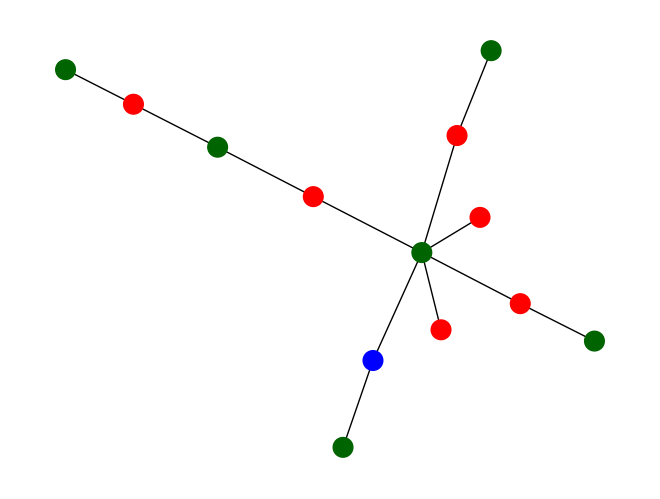

In [16]:
plot_graph(class1)

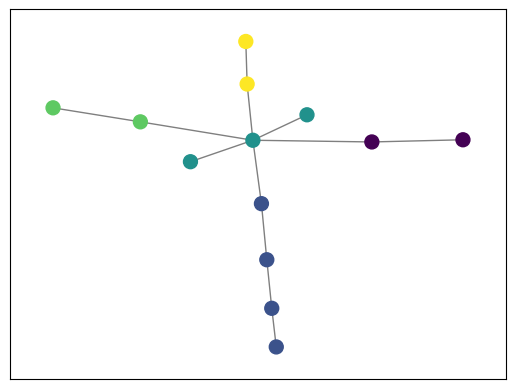

[{'0', '13', '3', '7'},
 {'1', '14', '8'},
 {'11', '4'},
 {'12', '6'},
 {'10', '9'}]

In [17]:
detect_community(class1)
list_com= nx.community.louvain_communities(class1, seed=123)
list_com

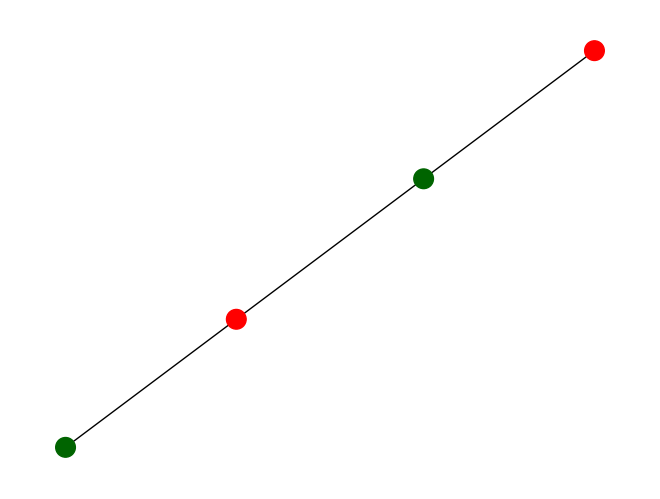

In [18]:
#Largest substructure
H = class1.subgraph(max(list_com, key=len))
plot_graph(H)

Explanation graph of class 2

In [19]:
class2_graph = nx.read_gexf(path+'sync912805233352/sync912805233352_G13.gexf')

In [20]:
syn_class_path = path + 'sync912805233352/sync912805233352_node_class13.pt'
node_class_syn = torch.load(syn_class_path).detach().numpy()
nx.set_node_attributes(class2_graph, dict(zip(class2_graph.nodes(), node_class_syn)), 'class')
class2 = remove_edges(class2_graph)

node count 5
edge count 4


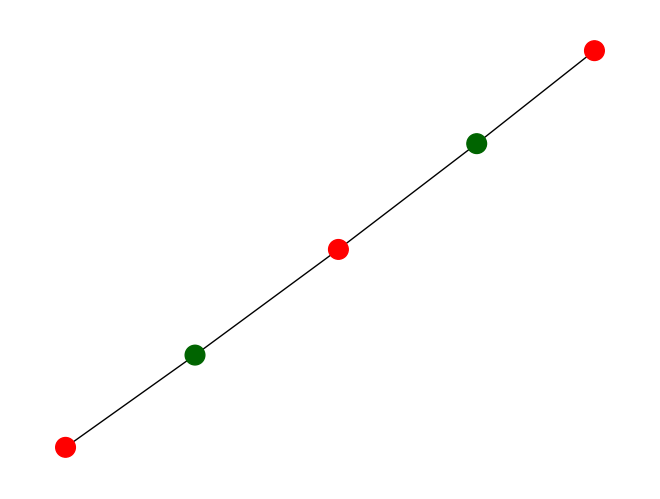

In [21]:
plot_graph(class2)

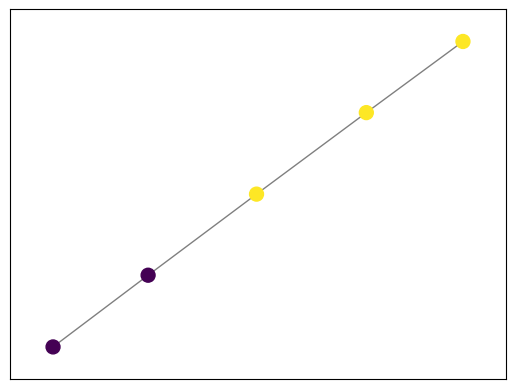

[{'0', '13'}, {'3', '7', '8'}]

In [22]:
detect_community(class2)
list_com= nx.community.louvain_communities(class2, seed=123)
list_com

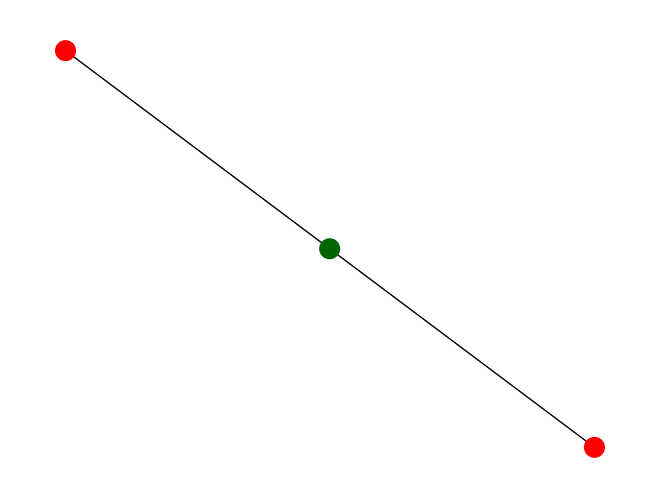

In [23]:
#Largest substructure
H = class2.subgraph(max(list_com, key=len))
plot_graph(H)